In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

sns.set_style('darkgrid')

%matplotlib inline

In [2]:
crime = pd.read_csv('data/NYPD_Arrests_Data__Historic_.csv')

In [50]:
crime_ytd = pd.read_csv('data/NYPD_Arrest_Data__Year_to_Date_.csv')

In [102]:
# crime_ytd = crime_ytd.loc[:,['ARREST_DATE', 'OFNS_DESC']]
crime_total = crime.loc[:,['ARREST_DATE']]
crime_total['date']=pd.to_datetime(crime_total['ARREST_DATE'])
crime_total = crime_total.groupby(pd.Grouper(key = 'date', freq='M')).count()


In [104]:
crime_total.reset_index(inplace=True)
crime_total['date'] = crime_total['date'].dt.strftime('%B-%Y')
crime_total.columns

Index(['date', 'ARREST_DATE'], dtype='object')

In [119]:
crime_total.rename({'ARREST_DATE': 'high'}, axis=1, inplace=True)

# df.set_index('Date_Time').groupby(pd.Grouper(freq='D')).mean()

In [192]:
# create a df with counts of input df rows grouped by input feature_name
def frequent_by_month(df, date_feature_name):
    df = df.loc[:,[date_feature_name]]
    df['date']=pd.to_datetime(df[date_feature_name])
    df = df.groupby(pd.Grouper(key = 'date', freq='M')).count()
    # reset index
    df.reset_index(inplace=True)
    df.rename({date_feature_name: 'high'}, axis=1, inplace=True)
    # strftime formatting: https://strftime.org/
    df['date'] = df['date'].dt.strftime('%b-%y')
    return df 

total_freq = frequent_by_month(crime, 'ARREST_DATE')

In [214]:
total_freq_trimed = total_freq[-36:]
lowest = max(total_freq_trimed['high'])
total_freq_trimed, max(total_freq_trimed['high']), min(total_freq_trimed['high'])

(       date   high
 144  Jan-18  23882
 145  Feb-18  21724
 146  Mar-18  22462
 147  Apr-18  21327
 148  May-18  22036
 149  Jun-18  19612
 150  Jul-18  20875
 151  Aug-18  21380
 152  Sep-18  18518
 153  Oct-18  19554
 154  Nov-18  18002
 155  Dec-18  17401
 156  Jan-19  20091
 157  Feb-19  17692
 158  Mar-19  19672
 159  Apr-19  19197
 160  May-19  19553
 161  Jun-19  17444
 162  Jul-19  19577
 163  Aug-19  18083
 164  Sep-19  16656
 165  Oct-19  17469
 166  Nov-19  15546
 167  Dec-19  13637
 168  Jan-20  16171
 169  Feb-20  15472
 170  Mar-20  13179
 171  Apr-20   8295
 172  May-20  13581
 173  Jun-20   8083
 174  Jul-20   7461
 175  Aug-20   9828
 176  Sep-20  11304
 177  Oct-20  13027
 178  Nov-20  11467
 179  Dec-20  12545,
 23882,
 7461)

In [204]:
# total_freq.to_csv('data/cleaned/total_crime.csv', index=False) 
total_freq_trimed.to_json('data/cleaned/total_crime.json', orient="records")
# result.to_csv('data/cleaned/total_crime.csv', index=False) 

In [129]:
pd.isna(crime['OFNS_DESC']).sum()

9066

In [133]:
crime_ofns = crime.loc[['OFNS_DESC', 'ARREST_DATE']]
crime_ofns = crime_ofns.dropna(how='any')
pd.isna(crime_ofns['OFNS_DESC']).sum()

0

In [147]:
# np.unique(crime_ofns['OFNS_DESC'])
# crime['OFNS_DESC']

ofns_counts = crime.OFNS_DESC.value_counts(normalize=False)
print(ofns_counts.shape)

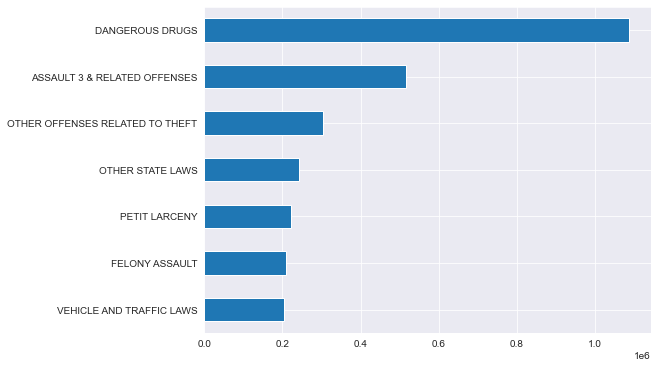

In [220]:
# visualize top 10 ofns frequency 
top_ofns = ofns_counts[:7]
top_ofns.plot(kind='barh', figsize=(8, 6)).invert_yaxis()

In [219]:
for ofns_category in ofns_counts[:7].index:
    df_curr = crime.loc[crime['OFNS_DESC'] == ofns_category]
    freq_by_ofns = frequent_by_month(df_curr, 'ARREST_DATE')[-36:]
    filename = ofns_category.replace(" ", '_').lower()
    print(' min:', min(freq_by_ofns['high']), ' max:',  max(freq_by_ofns['high'] ))
    freq_by_ofns.to_json(f'data/cleaned/{filename}.json', orient="records")

    

 min: 212  max: 3812
 min: 1516  max: 3145
 min: 361  max: 2705
 min: 0  max: 213
 min: 459  max: 2146
 min: 804  max: 1500
 min: 93  max: 2251


In [3]:
## clean data for map
crime.columns


Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [ ]:
# extract df by year
def get_year_df(df, year):
    df['date'] = pd.to_datetime(df['ARREST_DATE']) 

    mask = (df['date'] >= pd.to_datetime('01/01/' + str(year))) & (df['date']  < pd.to_datetime('01/01/' + str(year + 1)))
    return  df.loc[mask]

In [36]:

crime_precinct = crime.loc[:, ['ARREST_PRECINCT', 'ARREST_DATE']]

crime_precinct_2018 = get_year_df(crime_precinct, 2018)
crime_precinct_2019 = get_year_df(crime_precinct, 2019)
crime_precinct_2020 = get_year_df(crime_precinct, 2020)


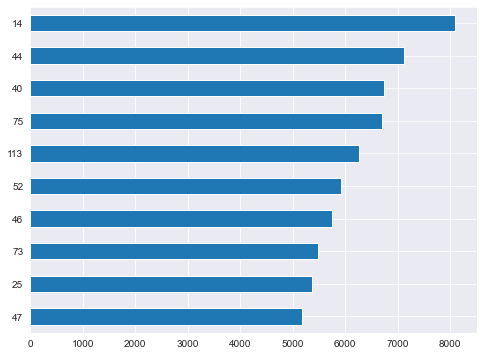

In [37]:
precinct_2018_counts = crime_precinct_2018.ARREST_PRECINCT.value_counts(normalize=False)
precinct_2018_counts[:10].plot(kind='barh', figsize=(8, 6)).invert_yaxis()

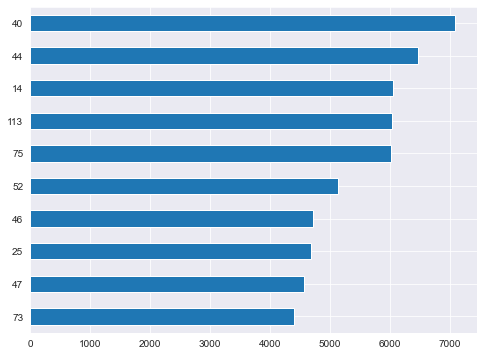

In [39]:
precinct_2019_counts = crime_precinct_2019.ARREST_PRECINCT.value_counts(normalize=False)
precinct_2019_counts[:10].plot(kind='barh', figsize=(8, 6)).invert_yaxis()

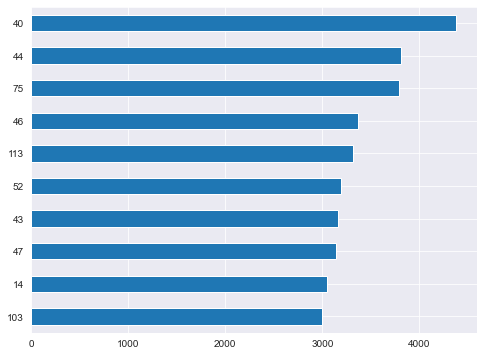

In [40]:
precinct_2020_counts = crime_precinct_2020.ARREST_PRECINCT.value_counts(normalize=False)
precinct_2020_counts[:10].plot(kind='barh', figsize=(8, 6)).invert_yaxis()

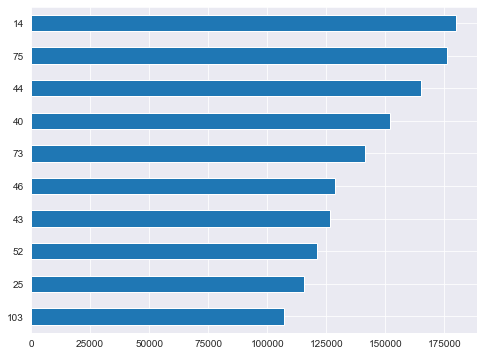

In [56]:
precinct_all = crime.ARREST_PRECINCT.value_counts(normalize=False)
precinct_all[:10].plot(kind='barh', figsize=(8, 6)).invert_yaxis()

In [55]:
precinct_all.to_json()

'{"14":179971,"75":176046,"44":165166,"40":151858,"73":141278,"46":128498,"43":126364,"52":121176,"25":115660,"103":107070,"113":100044,"115":96412,"79":93609,"120":92843,"47":92565,"41":91581,"67":91267,"48":90399,"42":86669,"114":81897,"83":81256,"32":79739,"77":79695,"110":78834,"5":77949,"23":76108,"34":73243,"18":71902,"70":71643,"28":71381,"33":70995,"109":68303,"71":67333,"13":67019,"60":65417,"81":63603,"1":62532,"84":62227,"105":61285,"102":58483,"6":56461,"30":55743,"104":55178,"90":54161,"9":54005,"72":53442,"49":51129,"106":50653,"101":48353,"7":46657,"19":44955,"122":43961,"61":43651,"10":43448,"107":43429,"45":42811,"69":40934,"24":40089,"26":39808,"108":37619,"88":37213,"62":36319,"68":33896,"112":33118,"63":32936,"50":30688,"76":29891,"20":29680,"100":27437,"78":27258,"17":26192,"66":25864,"121":24639,"111":23171,"94":22530,"123":20145,"22":6584,"27":1}'